In [18]:
import openai
import os
import numpy as np
from PIL import Image
from extract_text import extract

In [19]:
def normalization(x):
    x_min = np.min(x)
    x_max = np.max(x)
    x_scaled = 255 * (x - x_min) / (x_max - x_min)

    return x_scaled.astype(np.uint8)

In [20]:
# 埋め込みを計算する文章
input_text = '青空文庫からPythonで本文を取得するコードです。作業ステップは以下の通りです。'

In [21]:
# OpenAIのAPI Keyをテキストファイルから取得
with open('api_key.txt', 'r') as f:
    openai.api_key = f.read()

# APIの呼び出し
response = openai.Embedding.create(
    input=input_text,
    model='text-embedding-ada-002'
)

embeddings = np.array(response['data'][0]['embedding']) # APIレスポンスから埋め込みを取得
normalized_embeddings = normalization(embeddings) # 埋め込みベクトルを0~255に正規化

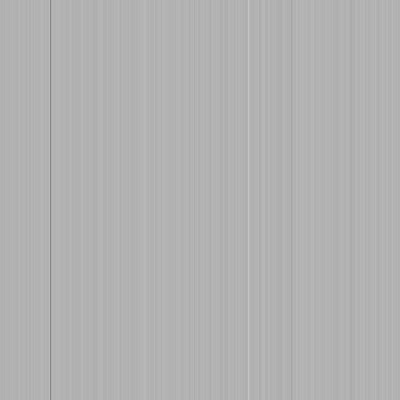

In [22]:
image_matrix = np.stack([normalized_embeddings for _ in range(len(normalized_embeddings))]) # 埋め込みベクトルを行列に変換
image = Image.fromarray(image_matrix)   # 行列を画像に変換

if not os.path.exists('./output'):
    os.makedirs('./output')
    
image.resize(size=(400, 400))   # 画像を400×400にリサイズして表示